In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solving Systems of Nonlinear Equations

Consider a system of $m$ nonlinear equations of the form

$$\begin{align}
y_1 &= f_1(\boldsymbol{x}) = 0 \nonumber \\
y_2 &= f_2(\boldsymbol{x}) = 0 \nonumber \\
\vdots \nonumber \\
y_m &= f_m(\boldsymbol{x}) = 0 \nonumber \\
\end{align}$$

where $\boldsymbol{x} = [x_1, x_2, \ldots, x_m]^T$ is the vector of inputs to the nonlinear equations. We wish to solve for the solution vector, $\boldsymbol{x}$, that satisfies this system of equations. Let $\boldsymbol{f}(\boldsymbol{x}) = [f_1(\boldsymbol{x}), f_2(\boldsymbol{x}), \ldots, f_m(\boldsymbol{x})]^T$ be the vector of nonlinear equations.

We start by expanding out the Taylor series to a first-order approximation. Let $\bar{\boldsymbol{x}}$ be the fixed point we expand the approximation about.

$$0 = \boldsymbol{f}(\boldsymbol{x}) \overset{\Delta}= \boldsymbol{f}(\bar{\boldsymbol{x}}) + \nabla \boldsymbol{f}(\bar{\boldsymbol{x}})(\boldsymbol{x} - \bar{\boldsymbol{x}}) + \mathcal{O}^2$$
$$0 \approx \boldsymbol{f}(\bar{\boldsymbol{x}}) + \nabla \boldsymbol{f}(\bar{\boldsymbol{x}})(\boldsymbol{x} - \bar{\boldsymbol{x}})$$

We omit the higher-order terms and set the approximation equal to zero which will let us solve this problem linearly.

$$0 = \boldsymbol{f}(\bar{\boldsymbol{x}}) + \nabla \boldsymbol{f}(\bar{\boldsymbol{x}})(\boldsymbol{x} - \bar{\boldsymbol{x}})$$

Let's inspect the $\nabla \boldsymbol{f}(\bar{\boldsymbol{x}})$ term. $\nabla$ is the gradiant operator which performs a vector derivative on its operand. Recall that both $\boldsymbol{x}$ and $\boldsymbol{f}(\boldsymbol{x})$ are vector quantities.

$$\nabla \boldsymbol{f}(\bar{\boldsymbol{x}}) = \frac{\partial \boldsymbol{f}}{\partial \boldsymbol{x}}(\bar{\boldsymbol{x}}) = 
\begin{bmatrix}
    \dfrac{\partial f_1}{\partial x_1}(\bar{\boldsymbol{x}}) & \dfrac{\partial f_1}{\partial x_2}(\bar{\boldsymbol{x}}) & \ldots & \dfrac{\partial f_1}{\partial x_m}(\bar{\boldsymbol{x}}) \\[3ex]
    \dfrac{\partial f_2}{\partial x_1}(\bar{\boldsymbol{x}}) & \dfrac{\partial f_2}{\partial x_2}(\bar{\boldsymbol{x}}) & \ldots & \dfrac{\partial f_2}{\partial x_m}(\bar{\boldsymbol{x}}) \\[1ex]
    \vdots & \vdots & \ddots & \vdots \\[1ex]
    \dfrac{\partial f_m}{\partial x_1}(\bar{\boldsymbol{x}}) & \dfrac{\partial f_m}{\partial x_2}(\bar{\boldsymbol{x}}) & \ldots & \dfrac{\partial f_m}{\partial x_m}(\bar{\boldsymbol{x}}) \\
\end{bmatrix} = J(\bar{\boldsymbol{x}})$$

Here, we define the Jacobian matrix, $J(\bar{\boldsymbol{x}})$. Each element of the this matrix represents the derivative of one of the nonlinear functions with respect to a specific input evaluated at the linearized point, $\bar{\boldsymbol{x}}$. We can substitute the Jacobian into the first-order approximation.

$$0 = \boldsymbol{f}(\bar{\boldsymbol{x}}) + J(\bar{\boldsymbol{x}})(\boldsymbol{x} - \bar{\boldsymbol{x}})$$

Simplify this expression further by letting $\bar{f} = f(\bar{\boldsymbol{x}})$ and $\bar{J} = J(\bar{\boldsymbol{x}})$.

$$0 = \bar{f} + \bar{J}(\boldsymbol{x} - \bar{\boldsymbol{x}})$$

Rearranging this equation and solving for the solution, $\boldsymbol{x}$, we get

$$\boldsymbol{x} = \bar{\boldsymbol{x}} - \bar{J}^{-1} \bar{f}$$

Recall that $\bar{\boldsymbol{x}}$ represents a fixed-point, $\bar{f} = f(\boldsymbol{x})$, and $\bar{J} = J(\bar{\boldsymbol{x}})$. As an iterative process, we are solving for $\boldsymbol{x}_{k+1}$ given an initial guess, $\boldsymbol{x}_k$. Here we define

$$f_k = f(\boldsymbol{x}_k)$$
$$J_k = J(\boldsymbol{x}_k)$$

We now arrive at the solution to the iterative process for solving systems of nonlinear equations. Note the resemblance to the Newton-Raphson method we learned earlier in the semester which dealt with the one-dimensional (scalar) case. This equation represents the more general form for a system of arbitrary dimensions.

$$\boxed{\boldsymbol{x}_{k+1} = \boldsymbol{x}_k - J^{-1}_k \boldsymbol{f}_k}$$

## Example 1

Let's try an example. Consider the following system of equations:

$$\begin{align}
f_1(\boldsymbol{x}) &= x_1^3 + x_2 - 1 = 0 \nonumber \\
f_2(\boldsymbol{x}) &= -x_1 + x_2^3 + 1 = 0\nonumber
\end{align}$$

Given the initial guess of $\boldsymbol{x_0} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$, find the solution to this systems of nonlinear equations to a residual tolerance of $\lVert \boldsymbol{f}(\boldsymbol{x}) \rVert _2 < 10^{-8}$. Report the number of iterations, the residual, and the solution.

In [7]:
def f(x):
    f1 = x[0]**3 + x[1] - 1
    f2 = -x[0] + x[1]**3 + 1
    return np.array([f1,f2],dtype=float)

def J(x):
    return np.array([[3*x[0]**2, 1],
                     [-1, 3*x[1]**2]],dtype=float)

x0 = np.array([1,1])
tol = 1e-8
maxIter = 100

for i in range(1,maxIter+1):
    J_inv = np.linalg.inv(J(x0))
    x = x0 - J_inv@f(x0) # Newton's method
    x0 = x

    res = abs(f(x)) # residual vector
    convCrit = np.linalg.norm(res) < tol

    if convCrit:
        print(f'Iterations = {i}')
        print(f'Normed residual = {np.linalg.norm(res)}')
        print(f'x = {x}')
        break

Iterations = 6
Normed residual = 1.817881472295665e-12
x = [1.00000000e+00 1.82650037e-12]


## Example 2

Let's try another example. Consider the following system of equations:

$$\begin{align}
f_1(\boldsymbol{x}) &= 3x_1 + x_1^2 + x_2^2 = 0 \nonumber \\
f_2(\boldsymbol{x}) &= x_1x_2 - x_2^2 = 0\nonumber
\end{align}$$

Given the initial guess of $\boldsymbol{x_0} = \begin{bmatrix} 2 \\ 2 \end{bmatrix}$, find the solution to this system of nonlinear equations to a residual tolerance of $\lVert \boldsymbol{f}(\boldsymbol{x}) \rVert _2 < 10^{-10}$. Report the number of iterations, the residual, and the solution.

In [3]:
# CODE SOLUTION HERE

# Nonlinear Least-Squares Iterative Method

Let $n > m$. For a given set of $n$ data points, $[x_n,y_n]$,

$$\boldsymbol{x} = \begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{bmatrix}, ~~~~~
\boldsymbol{y} = \begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}$$

a set of $m$ unknown parameters, $\boldsymbol{c}$,

$$\boldsymbol{c} = \begin{bmatrix}
    c_1 \\
    c_2 \\
    \vdots \\
    c_m
\end{bmatrix}$$

and a nonlinear fitting function, $\hat{\boldsymbol{y}} = f(\boldsymbol{x},\boldsymbol{c})$, we want to find the solution that minimizes the $L_2$-norm of the residual, $\boldsymbol{r} = \hat{\boldsymbol{y}} - \boldsymbol{y}$. The least-squares minimization problem is given by

$$\min \sum_{k=1}^{n}\left(\hat{y}(x_{k}) - y_{k}\right)^{2}$$

Unlike the classic linear least-squares problem, we cannot immediately convert the equation $\hat{\boldsymbol{y}} = f(\boldsymbol{x},\boldsymbol{c})$ into a linear form $\boldsymbol{y} = A \boldsymbol{x}$ since the parameters are embedded in the equation in a nonlinear fashion that cannot be simplified. To remedy this, we will start by considering the residual equation which is equal to zero in the most ideal case (we want to minimize it). Recall how we defined the residual

$$\boldsymbol{r} = \hat{\boldsymbol{y}} - \boldsymbol{y}$$

More explicitly, we write 

$$\boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\boldsymbol{c}) = f(\boldsymbol{x},\boldsymbol{c}) - \boldsymbol{y} = 0$$

Now we can linearize the residual function, $\boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\boldsymbol{c})$, about a fixed-point, $\bar{\boldsymbol{c}}$, by means of a first-order Taylor series expansion.

$$0 = \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\boldsymbol{c}) \overset{\Delta}= \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\bar{\boldsymbol{c}}) + \nabla \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\bar{\boldsymbol{c}})(\boldsymbol{c} - \bar{\boldsymbol{c}}) + \mathcal{O}^2$$
$$0 \approx \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\bar{\boldsymbol{c}}) + \nabla \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\bar{\boldsymbol{c}})(\boldsymbol{c} - \bar{\boldsymbol{c}})$$

We omit the higher-order terms and set this approximation equal to zero which will let us solve this problem linearly.

$$0 = \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\bar{\boldsymbol{c}}) + \nabla \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\bar{\boldsymbol{c}})(\boldsymbol{c} - \bar{\boldsymbol{c}})$$

Let's quickly inspect the gradient of the residual to see how we can simplify the expression.

$$\begin{align}
\nabla \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\bar{\boldsymbol{c}}) &= \nabla \left( f(\boldsymbol{x},\bar{\boldsymbol{c}}) - \boldsymbol{y} \right) \nonumber \\
&= \nabla f(\boldsymbol{x},\bar{\boldsymbol{c}}) - \nabla \boldsymbol{y} \nonumber \\
&= \nabla f(\boldsymbol{x},\bar{\boldsymbol{c}}) \nonumber
\end{align}$$

Therefore, we can rewrite the linear approximation as

$$0 = \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\bar{\boldsymbol{c}}) + \nabla f(\boldsymbol{x},\bar{\boldsymbol{c}}) (\boldsymbol{c} - \bar{\boldsymbol{c}})$$

Similar to our earlier discussion on solving systems of nonlinear equations, $\nabla f(\boldsymbol{x},\bar{\boldsymbol{c}})$ will return a Jacobian matrix. Note that for this problem, the unknown parameters are in the vector $\boldsymbol{c}$ (not $\boldsymbol{x}$, which contains the input data points). This implies that our gradient is with respect to the coefficients, $\boldsymbol{c}$. In other words, $\nabla = \dfrac{\partial}{\partial \boldsymbol{c}}$. In the case of the nonlinear least-squares problem, the Jacobian matrix will have the form,

$$\nabla f(\boldsymbol{x},\bar{\boldsymbol{c}}) = \frac{\partial f}{\partial \boldsymbol{c}}(\boldsymbol{x},\bar{\boldsymbol{c}}) = 
\begin{bmatrix}
    \dfrac{\partial f}{\partial c_1}(x_1,\bar{\boldsymbol{c}}) & \dfrac{\partial f}{\partial c_2}(x_1,\bar{\boldsymbol{c}}) & \ldots & \dfrac{\partial f}{\partial c_m}(x_1,\bar{\boldsymbol{c}}) \\[3ex]
    \dfrac{\partial f}{\partial c_1}(x_2,\bar{\boldsymbol{c}}) & \dfrac{\partial f}{\partial c_2}(x_2,\bar{\boldsymbol{c}}) & \ldots & \dfrac{\partial f}{\partial c_m}(x_2,\bar{\boldsymbol{c}}) \\[1ex]
    \vdots & \vdots & \ddots & \vdots \\[1ex]
    \dfrac{\partial f}{\partial c_1}(x_n,\bar{\boldsymbol{c}}) & \dfrac{\partial f}{\partial c_2}(x_n,\bar{\boldsymbol{c}}) & \ldots & \dfrac{\partial f}{\partial c_m}(x_n,\bar{\boldsymbol{c}}) \\
\end{bmatrix} = J(\boldsymbol{x},\bar{\boldsymbol{c}})$$

Note that the rows correspond to the $n$ data points, $\boldsymbol{x}$, and the columns correspond to the partial derivative of the fitting function with respect to the $m$ unknown parameters, $\boldsymbol{c}$. We can substitute the Jacobian into the first order approximation and let $\Delta \boldsymbol{c} = (\boldsymbol{c} - \bar{\boldsymbol{c}})$ to get

$$0 = \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\bar{\boldsymbol{c}}) + J(\boldsymbol{x},\bar{\boldsymbol{c}}) \Delta \boldsymbol{c}$$

Simplify this expression further by letting $\bar{\boldsymbol{r}} = \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\bar{\boldsymbol{c}})$ and $\bar{J} = J(\boldsymbol{x},\bar{\boldsymbol{c}})$

$$0 = \bar{\boldsymbol{r}} + \bar{J} \Delta \boldsymbol{c}$$

Recall that the vector $\boldsymbol{c}$ contains the unknown parameters we wish to solve for. It is embedded in the term $\Delta \boldsymbol{c} = (\boldsymbol{c} - \bar{\boldsymbol{c}})$. Therefore, if we can solve $\Delta \boldsymbol{c}$, we can extract the solution $\boldsymbol{c}$. Rearrange this equation to get it into a form that can be solved with the linear-least squares solution.

$$\boxed{-\bar{\boldsymbol{r}} = \bar{J} \Delta \boldsymbol{c}} \implies \boldsymbol{y} = A \boldsymbol{x}$$

From previous lessons, we already know the solution to this problem so we can solve for the difference vector, $\Delta \boldsymbol{c}$, with the equation

$$\Delta \boldsymbol{c} = -\left(\bar{J}^T \bar{J}\right)^{-1} \bar{J}^T \bar{\boldsymbol{r}}$$

Substituting for $\Delta \boldsymbol{c} = (\boldsymbol{c} - \bar{\boldsymbol{c}})$ and rearranging the equation, solve for the unknown parameters, $\boldsymbol{c}$.

$$\boldsymbol{c} - \bar{\boldsymbol{c}} = -\left(\bar{J}^T \bar{J}\right)^{-1} \bar{J}^T \bar{\boldsymbol{r}}$$
$$\boldsymbol{c} = \bar{\boldsymbol{c}} - \left(\bar{J}^T \bar{J}\right)^{-1} \bar{J}^T \bar{\boldsymbol{r}}$$

Recall that $\bar{\boldsymbol{c}}$ represents a fixed-point, $\bar{J} = J(\boldsymbol{x},\bar{\boldsymbol{c}})$, and $\bar{\boldsymbol{r}} = \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\bar{\boldsymbol{c}})$. As an iterative process, we are solving for $\boldsymbol{c}_{k+1}$ given an initial guess, $\boldsymbol{c}_k$. Here we define

$$J_k = J(\boldsymbol{x},\boldsymbol{c}_k)$$
$$\boldsymbol{r}_k = \boldsymbol{r}(\boldsymbol{x},\boldsymbol{y},\boldsymbol{c}_k)$$

We now arrive at the solution to the iterative nonlinear least-squares problem

$$\boxed{\boldsymbol{c}_{k+1} = \boldsymbol{c}_k - \left(J_k^T J_k\right)^{-1} J_k^T \boldsymbol{r}_k}$$

This method converges under the following error and residual criteria

$$\begin{align}
% \text{Error Criteria: } \lVert \boldsymbol{c}_{k+1} \rVert &< \lVert \boldsymbol{c}_{k} \rVert \nonumber \\
\text{Residual Criteria: } \lVert \boldsymbol{r}_{k+1} \rVert &< \lVert \boldsymbol{r}_{k} \rVert \implies \lVert \boldsymbol{f}_{k+1} - \boldsymbol{y} \rVert < \lVert \boldsymbol{f}_{k} - \boldsymbol{y} \rVert \implies \lVert \boldsymbol{f}_{k+1} \rVert < \lVert \boldsymbol{f}_{k} \rVert \nonumber
\end{align}$$

where $\boldsymbol{f}_k = f(\boldsymbol{x}, \boldsymbol{c}_k)$. When asked to iterate this method to a specified tolerance, $\varepsilon$, this criteria is expressed as

$$\begin{align}
% \text{Error Criteria: } \lVert \boldsymbol{c}_{k+1} - \boldsymbol{c}_{k}\rVert &< \varepsilon \nonumber \\
\text{Residual Criteria: } \lVert \boldsymbol{r}_{k+1} - \boldsymbol{r}_{k} \rVert &< \varepsilon \implies \lVert \boldsymbol{f}_{k+1} - \boldsymbol{f}_{k} \rVert < \varepsilon \nonumber
\end{align}$$

## Example

Create 100 data points for $x$ uniformly distributed between $-1.5$ and $1.5$ with the equation

$$f(x) = \beta_1 x^3 + \beta_2 e^{\beta_3 x} + \beta_4 x \sin{x^2}$$

where

$$\beta =
\begin{bmatrix}
    2 \\
    4 \\
    -0.5 \\
    -\pi/2
\end{bmatrix}$$

Corrupt the measurments with Gaussian noise $\mathcal{N}(0,0.1)$. Estimate the parameters by iterative nonlinear least-squares with initial guess $\beta = [1,1,1,1]^T$ to an $L_2$-normed residual tolerance of $1 \times 10^{-5}$

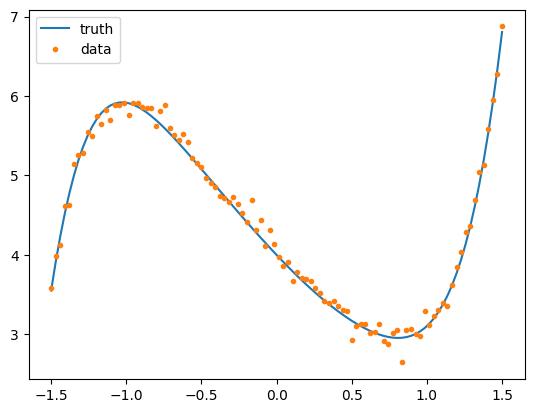

In [15]:
def f(x,B):
    return B[0]*x**3 + B[1]*np.exp(B[2]*x) + B[3]*x*np.sin(x**2)

def J(x,B):
    return np.array([x**3, np.exp(B[2]*x), x*B[1]*np.exp(B[2]*x), x*np.sin(x**2)]).T

B_true = np.array([2,4,-0.5,-np.pi/2])
x = np.linspace(-1.5,1.5,100)

f_true = f(x,B_true)
noise = np.random.normal(0,0.1,100)
f_meas = f_true + noise

plt.plot(x,f_true,label='truth')
plt.plot(x,f_meas,'.',label='data')
plt.legend()
plt.show()

In [16]:
B_0 = np.array([1,1,1,1],dtype=float)
tol = 1e-5
maxIter = 100
res0 = f(x,B_0) - f_meas

for i in range(1, maxIter+1):
    B = B_0 - np.linalg.pinv(J(x,B_0)) @ res0
    res1 = f(x,B) - f_meas

    convCrit = abs(res1 - res0)
    convCritNorm = np.linalg.norm(convCrit)

    B_0 = B
    res0 = res1

    if convCritNorm < tol:
        print(f'Iterations: {i}')
        print(f'Normed residual difference: {convCritNorm}')
        print(f'B = {B}')
        break

Iterations: 5
Normed residual difference: 7.815350234739092e-06
B = [ 1.99262168  4.0297826  -0.4970243  -1.54078711]


In [6]:
# CODE SOLUTION HERE